# Twitter API - looking at wine preferences

The code in this notebook is for gathering tweets regarding types of wine. We plan to gain insight into the UK population's wine preferences based on the frequency with which each category of wine is mentioned in the past week's tweets.

## Problems during data collection
1. When filtering the tweets by geolocation there were very few tweets from the UK in the last week. 
2. The order of the key terms in the request affects the resulting tweets.
3. There were instances in the resulting tweets which did not mention exactly what we were looking for i.e. wrong context.

## Solutions to the problems identified
1. We decided to remove the location filter and assume that all English speakers have the same preferences.
2. We repeated the tweet request four times, with each wine category in the first position once, and used all that data to obtain the ranking of the categories.
3. When iterating through the tweets to count the number of times each category was mentioned, we ensured in our code such cases did not yield a count, hence cleaning the data in this way.

## Steps in retrieving the tweets
1. Access the Twitter API
2. Decide on the key search terms and how many tweets to retrieve considering the limit
3. Do this for all 4 search combinations:
    - Create a dictionary with empty lists to pass the tweets in
    - Collect original tweets (no retweets) written in English and starting with red wine in terms
    - Create a for loop that iterates through all the words in the text and identifies the instances where red wine, white wine, sparkling wine and rosé wine are mentioned and gives a point to each category based on that.
    - Add the points to the corresponding empty list in the dictionary and pass the dictionary into a dataframe
    - Save as CSV to work on the specific tweets you retrieved, otherwise results would change every moment as new tweets are made
    - Find the sum of tweets for each type of wine

4. Create a dataframe with the sum of each wine category for the four different tweet requests
5. Find the overall sum of each wine category which indicates the ranking of the wine types
6. Plot a pie chart with the percentage that each wine category was mentioned in the 4000 tweets

In [1]:
#load modules
import tweepy
from tweepy import OAuthHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pass Twitter API access keys
CONSUMER_API_KEY = 'qjUmq9iH4zwfb6uOJjW1dZdFR'
CONSUMER_API_SECRET = '1x2aYM2O9YgGScnlb0C3LbLUw2dqBk3mYgZYkl3uS0HXI7S5fb'
ACCESS_KEY = '1582746111667732480-P9mYGx1NXrHLi30lIcjHY8TZXOEoed'
ACCESS_SECRET = 'N9TP0ctqPS6TLWmpP4zwwu1Rmf99jPtSH2DfmUgNziXev'

CONSUMER_API_KEY = 'f86Ag4UOalJ6jiEZsETVxHO6H'
CONSUMER_API_SECRET = 'XZBhX2FbPimVdqjo357Im8NySjd8DqYxe7NZ3XjkTt951J4YBO'
ACCESS_KEY = '1305928503557324801-JiragPzkPQvG4FAgpZyriELFZWshR9'
ACCESS_SECRET = '0R44kQy6qkD4ujHWZEET2uZenWSLutuRapllLFtXCmj6g'

In [2]:
# CONSUMER_API_KEY = 'klfpmD5VsEWXD2x3qU6XQpqLq'
# CONSUMER_API_SECRET = 'tgHYwh6eWtb7aoYypdzBQKrD5zT7mDT5Dir2rOgWGkRIfdmdFS'
# ACCESS_KEY = '1124242297-PRznWTEAzOBhAMso56H1bjpHaFWUFMFpX3dCiy5'
# ACCESS_SECRET = 'vNPQrcig04p5Z7Z7pP9gyur25bxC74KdCoQDIrgyeHLk2'

In [3]:
CONSUMER_API_KEY = "OuiRIec3lsnELwwgIx0LQjYH3"
CONSUMER_API_SECRET = "P2TEkvjEi1zKqlHBHyxObCTHloQWhsbq2QAxNW00TkxpGbC44q"
ACCESS_KEY = "1572174194116288514-3vWGzXLPsbBFTBGHFIZq52JNk0YBXm"
ACCESS_SECRET = "SpNoEipMT0vCfcDWpiNqdfwnWEN1QUhQ6sVbZxuWn7OLj"
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAPJ2iQEAAAAAyasB1hQ%2BxL5U%2BfcRpEdC%2BhlbBMM%3DT5hshcto6vgmM8Cx3S3SIIaDC1Mf8rlM2uCwaTnov7ZyrCM4Vu"


In [4]:
#access Twitter API
auth = tweepy.OAuthHandler(CONSUMER_API_KEY, CONSUMER_API_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
#Create a dictionary with empty lists for all the information you want from the tweets
tweets_red = {
    "user" : [],
    "red_wine" : [],
    "white_wine": [],
    "sparkling_wine":[],
    "rosé_wine": [],
    "content": []
}
#Collect tweets starting with red wine in terms
pos = 0 #start from 0 then if a type of wine is identified it will get one point
for tweet in tweepy.Cursor(api.search_tweets,q="red wine OR white wine OR sparkling wine OR rosé wine AND -filter:retweets", 
                           lang="en", tweet_mode='extended').items(1000): #filter retweets to get only original tweets, get tweet_mode extended so you can retrieve the full text, only look at tweets in English
    tweets_red["user"].append(tweet.user.screen_name) #add all the usernames from the tweets retrieved to the empty user list in the dictionary
    tweets_red["content"].append(tweet.full_text) #add the text from all the tweets retrieved to the empty content list in the dictionary
    red, white, sparkling, rosé = 0, 0,0,0 #initialise all at 0 
    text = tweet.full_text.lower().replace(".", "").replace(",", "").split() #split the tweet text into individual words, make everything lowercase to ensure all instances of chosen words are recognised
    #replace full stop and comma with space because the delimeter is the space and the split function with stop if there is a full stop or comma
    for word in range(len(text)): #use a for loop to iterate through all the words in the text
        if text[word] == "wine": #find the word wine
            if text[word-1] == "red": #if the word red is before wine, give the variable red a point
                red += 1
            if text[word-1] == "white": #if the word white is before wine, give the variable white a point
                white +=1
            if text[word-1] == "sparkling": #if the word sparkling is before wine, give the variable sparkling a point
                sparkling +=1
            if text[word-1] == "rosé": #if the word rosé is before wine, give the variable rosé a point
                rosé +=1
    tweets_red["red_wine"].append(red) #add all the points in variable red to the empty red_wine list in the dictionary
    tweets_red["white_wine"].append(white) #add all the points in variable white to the empty white_wine list in the dictionary
    tweets_red["sparkling_wine"].append(sparkling) #add all the points in variable sparkling to the empty sparkling_wine list in the dictionary
    tweets_red["rosé_wine"].append(rosé) #add all the points in variable rosé to the empty rosé_wine list in the dictionary

In [5]:
#pass the tweets into a daraframe and save as CSV
#the data will keep changing depending on when you retrieve the tweets, 
#so in this way I can save the snapshot of 1000 tweets from the week 26/10 - 02/11 and analyse it
df_tweets_red = pd.DataFrame(tweets_red)
df_tweets_red.to_csv('df_tweets_red.csv')

In [6]:
#read the CSV file
df_tweets_red = pd.read_csv('df_tweets_red.csv')

#aggregate the data and find the sum of tweets for each type of wine
gb_tweets_red = df_tweets_red.groupby("red_wine")["white_wine", "sparkling_wine", "rosé_wine","red_wine"].aggregate(np.sum)
gb_tweets_red

/tmp/ipykernel_8140/254439346.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb_tweets_red = df_tweets_red.groupby("red_wine")["white_wine", "sparkling_wine", "rosé_wine","red_wine"].aggregate(np.sum)


,white_wine,sparkling_wine,rosé_wine,red_wine
red_wine,,,,
0,12,2,1,0
1,27,1,0,714
2,0,0,0,20


In [7]:
#get the cumulative sum for each type of wine
gb_tweets_red['cumsum_white_wine'] = gb_tweets_red['white_wine'].cumsum()
gb_tweets_red['cumsum_sparkling_wine'] = gb_tweets_red['sparkling_wine'].cumsum()
gb_tweets_red['cumsum_rosé_wine'] = gb_tweets_red['rosé_wine'].cumsum()
gb_tweets_red['cumsum_red_wine'] = gb_tweets_red['red_wine'].cumsum()
gb_tweets_red #print the updated dataframe including cumulative sums

,white_wine,sparkling_wine,rosé_wine,red_wine,cumsum_white_wine,cumsum_sparkling_wine,cumsum_rosé_wine,cumsum_red_wine
red_wine,,,,,,,,
0,12,2,1,0,12,2,1,0
1,27,1,0,714,39,3,1,714
2,0,0,0,20,39,3,1,734


In [ ]:
#Create a dictionary with empty lists for all the information you want from the tweets
tweets_white = {
    "user" : [],
    "red_wine" : [],
    "white_wine": [],
    "sparkling_wine":[],
    "rosé_wine": [],
    "content": []
}
#Collect tweets starting with red wine in terms
pos = 0 #start from 0 then if a type of wine is identified it will get one point
for tweet in tweepy.Cursor(api.search_tweets,q="white wine OR sparkling wine OR  rosé wine OR red wine AND -filter:retweets", 
                           lang="en", tweet_mode='extended').items(1000): #filter retweets to get only original tweets, get tweet_mode extended so you can retrieve the full text, only look at tweets in English
    tweets_white["user"].append(tweet.user.screen_name) #add all the usernames from the tweets retrieved to the empty user list in the dictionary
    tweets_white["content"].append(tweet.full_text) #add the text from all the tweets retrieved to the empty content list in the dictionary
    red, white, sparkling, rosé = 0, 0,0,0 #initialise all at 0 
    text = tweet.full_text.lower().replace(".", "").replace(",", "").split() #split the tweet text into individual words, make everything lowercase to ensure all instances of chosen words are recognised
    #replace full stop and comma with space because the delimeter is the space and the split function with stop if there is a full stop or comma
    for word in range(len(text)): #use a for loop to iterate through all the words in the text
        if text[word] == "wine": #find the word wine
            if text[word-1] == "red": #if the word red is before wine, give the variable red a point
                red += 1
            if text[word-1] == "white": #if the word white is before wine, give the variable white a point
                white +=1
            if text[word-1] == "sparkling": #if the word sparkling is before wine, give the variable sparkling a point
                sparkling +=1
            if text[word-1] == "rosé": #if the word rosé is before wine, give the variable rosé a point
                rosé +=1
    tweets_white["red_wine"].append(red) #add all the points in variable red to the empty red_wine list in the dictionary
    tweets_white["white_wine"].append(white) #add all the points in variable white to the empty white_wine list in the dictionary
    tweets_white["sparkling_wine"].append(sparkling) #add all the points in variable sparkling to the empty sparkling_wine list in the dictionary
    tweets_white["rosé_wine"].append(rosé) #add all the points in variable rosé to the empty rosé_wine list in the dictionary

In [9]:
#pass the tweets into a daraframe and save as CSV
#the data will keep changing depending on when you retrieve the tweets, 
#so in this way I can save the snapshot of 1000 tweets from the week 26/10 - 02/11 and analyse it
df_tweets_white = pd.DataFrame(tweets_white)
df_tweets_white.to_csv('df_tweets_white.csv')

In [9]:
#read the CSV file
df_tweets_white = pd.read_csv('df_tweets_white.csv')

#aggregate the data and find the sum of tweets for each type of wine
gb_tweets_white = df_tweets_white.groupby("red_wine")["white_wine", "sparkling_wine", "rosé_wine","red_wine"].aggregate(np.sum)
gb_tweets_white

/tmp/ipykernel_8140/1947933604.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb_tweets_white = df_tweets_white.groupby("red_wine")["white_wine", "sparkling_wine", "rosé_wine","red_wine"].aggregate(np.sum)


,white_wine,sparkling_wine,rosé_wine,red_wine
red_wine,,,,
0,563,7,0,0
1,51,1,0,85
2,4,0,0,8


In [10]:
#get the cumulative sum for each type of wine
gb_tweets_white['cumsum_white_wine'] = gb_tweets_white['white_wine'].cumsum()
gb_tweets_white['cumsum_sparkling_wine'] = gb_tweets_white['sparkling_wine'].cumsum()
gb_tweets_white['cumsum_rosé_wine'] = gb_tweets_white['rosé_wine'].cumsum()
gb_tweets_white['cumsum_red_wine'] = gb_tweets_white['red_wine'].cumsum()
gb_tweets_white #print the updated dataframe including cumulative sums

,white_wine,sparkling_wine,rosé_wine,red_wine,cumsum_white_wine,cumsum_sparkling_wine,cumsum_rosé_wine,cumsum_red_wine
red_wine,,,,,,,,
0,563,7,0,0,563,7,0,0
1,51,1,0,85,614,8,0,85
2,4,0,0,8,618,8,0,93


In [4]:
#Create a dictionary with empty lists for all the information you want from the tweets
tweets_sparkling = {
    "user" : [],
    "red_wine" : [],
    "white_wine": [],
    "sparkling_wine":[],
    "rosé_wine": [],
    "content": []
}
#Collect tweets starting with red wine in terms
pos = 0 #start from 0 then if a type of wine is identified it will get one point
for tweet in tweepy.Cursor(api.search_tweets,q="sparkling wine OR  rosé wine OR red wine OR white wine AND -filter:retweets", 
                           lang="en", tweet_mode='extended').items(1000): #filter retweets to get only original tweets, get tweet_mode extended so you can retrieve the full text, only look at tweets in English
    tweets_sparkling["user"].append(tweet.user.screen_name) #add all the usernames from the tweets retrieved to the empty user list in the dictionary
    tweets_sparkling["content"].append(tweet.full_text) #add the text from all the tweets retrieved to the empty content list in the dictionary
    red, white, sparkling, rosé = 0, 0,0,0 #initialise all at 0 
    text = tweet.full_text.lower().replace(".", "").replace(",", "").split() #split the tweet text into individual words, make everything lowercase to ensure all instances of chosen words are recognised
    #replace full stop and comma with space because the delimeter is the space and the split function with stop if there is a full stop or comma
    for word in range(len(text)): #use a for loop to iterate through all the words in the text
        if text[word] == "wine": #find the word wine
            if text[word-1] == "red": #if the word red is before wine, give the variable red a point
                red += 1
            if text[word-1] == "white": #if the word white is before wine, give the variable white a point
                white +=1
            if text[word-1] == "sparkling": #if the word sparkling is before wine, give the variable sparkling a point
                sparkling +=1
            if text[word-1] == "rosé": #if the word rosé is before wine, give the variable rosé a point
                rosé +=1
    tweets_sparkling["red_wine"].append(red) #add all the points in variable red to the empty red_wine list in the dictionary
    tweets_sparkling["white_wine"].append(white) #add all the points in variable white to the empty white_wine list in the dictionary
    tweets_sparkling["sparkling_wine"].append(sparkling) #add all the points in variable sparkling to the empty sparkling_wine list in the dictionary
    tweets_sparkling["rosé_wine"].append(rosé) #add all the points in variable rosé to the empty rosé_wine list in the dictionary

In [5]:
#pass the tweets into a daraframe and save as CSV
#the data will keep changing depending on when you retrieve the tweets, 
#so in this way I can save the snapshot of 1000 tweets from the week 26/10 - 02/11 and analyse it
df_tweets_sparkling = pd.DataFrame(tweets_sparkling)
df_tweets_sparkling.to_csv('df_tweets_sparkling.csv')

In [11]:
#read the CSV file
df_tweets_sparkling = pd.read_csv('df_tweets_sparkling.csv')

#aggregate the data and find the sum of tweets for each type of wine
gb_tweets_sparkling = df_tweets_sparkling.groupby("red_wine")["white_wine", "sparkling_wine", 
                                                              "rosé_wine","red_wine"].aggregate(np.sum)
gb_tweets_sparkling

/tmp/ipykernel_8140/3771795564.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb_tweets_sparkling = df_tweets_sparkling.groupby("red_wine")["white_wine", "sparkling_wine",


,white_wine,sparkling_wine,rosé_wine,red_wine
red_wine,,,,
0,22,560,5,0
1,5,6,0,25


In [12]:
#get the cumulative sum for each type of wine
gb_tweets_sparkling['cumsum_white_wine'] = gb_tweets_sparkling['white_wine'].cumsum()
gb_tweets_sparkling['cumsum_sparkling_wine'] = gb_tweets_sparkling['sparkling_wine'].cumsum()
gb_tweets_sparkling['cumsum_rosé_wine'] = gb_tweets_sparkling['rosé_wine'].cumsum()
gb_tweets_sparkling['cumsum_red_wine'] = gb_tweets_sparkling['red_wine'].cumsum()
gb_tweets_sparkling #print the updated dataframe including cumulative sums

,white_wine,sparkling_wine,rosé_wine,red_wine,cumsum_white_wine,cumsum_sparkling_wine,cumsum_rosé_wine,cumsum_red_wine
red_wine,,,,,,,,
0,22,560,5,0,22,560,5,0
1,5,6,0,25,27,566,5,25


In [14]:
#Create a dictionary with empty lists for all the information you want from the tweets
tweets_rosé = {
    "user" : [],
    "red_wine" : [],
    "white_wine": [],
    "sparkling_wine":[],
    "rosé_wine": [],
    "content": []
}
#Collect tweets starting with red wine in terms
pos = 0 #start from 0 then if a type of wine is identified it will get one point
for tweet in tweepy.Cursor(api.search_tweets,q="sparkling wine OR  rosé wine OR red wine OR white wine AND -filter:retweets", 
                           lang="en", tweet_mode='extended').items(1000): #filter retweets to get only original tweets, get tweet_mode extended so you can retrieve the full text, only look at tweets in English
    tweets_rosé["user"].append(tweet.user.screen_name) #add all the usernames from the tweets retrieved to the empty user list in the dictionary
    tweets_rosé["content"].append(tweet.full_text) #add the text from all the tweets retrieved to the empty content list in the dictionary
    red, white, sparkling, rosé = 0, 0,0,0 #initialise all at 0 
    text = tweet.full_text.lower().replace(".", "").replace(",", "").split() #split the tweet text into individual words, make everything lowercase to ensure all instances of chosen words are recognised
    #replace full stop and comma with space because the delimeter is the space and the split function with stop if there is a full stop or comma
    for word in range(len(text)): #use a for loop to iterate through all the words in the text
        if text[word] == "wine": #find the word wine
            if text[word-1] == "red": #if the word red is before wine, give the variable red a point
                red += 1
            if text[word-1] == "white": #if the word white is before wine, give the variable white a point
                white +=1
            if text[word-1] == "sparkling": #if the word sparkling is before wine, give the variable sparkling a point
                sparkling +=1
            if text[word-1] == "rosé": #if the word rosé is before wine, give the variable rosé a point
                rosé +=1
    tweets_rosé["red_wine"].append(red) #add all the points in variable red to the empty red_wine list in the dictionary
    tweets_rosé["white_wine"].append(white) #add all the points in variable white to the empty white_wine list in the dictionary
    tweets_rosé["sparkling_wine"].append(sparkling) #add all the points in variable sparkling to the empty sparkling_wine list in the dictionary
    tweets_rosé["rosé_wine"].append(rosé) #add all the points in variable rosé to the empty rosé_wine list in the dictionary

In [15]:
#pass the tweets into a daraframe and save as CSV
#the data will keep changing depending on when you retrieve the tweets, 
#so in this way I can save the snapshot of 1000 tweets from the week 26/10 - 02/11 and analyse it
df_tweets_rosé = pd.DataFrame(tweets_rosé)
df_tweets_rosé.to_csv('df_tweets_rosé.csv')

In [16]:
#read the CSV file
df_tweets_rosé = pd.read_csv('df_tweets_rosé.csv')

#aggregate the data and find the sum of tweets for each type of wine
gb_tweets_rosé = df_tweets_rosé.groupby("red_wine")["white_wine", "sparkling_wine", 
                                                    "rosé_wine","red_wine"].aggregate(np.sum)
gb_tweets_rosé

/tmp/ipykernel_8140/2258234649.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gb_tweets_rosé = df_tweets_rosé.groupby("red_wine")["white_wine", "sparkling_wine",


,white_wine,sparkling_wine,rosé_wine,red_wine
red_wine,,,,
0,20,546,5,0
1,5,6,0,25


In [17]:
#get the cumulative sum for each type of wine
gb_tweets_rosé['cumsum_white_wine'] = gb_tweets_rosé['white_wine'].cumsum()
gb_tweets_rosé['cumsum_sparkling_wine'] = gb_tweets_rosé['sparkling_wine'].cumsum()
gb_tweets_rosé['cumsum_rosé_wine'] = gb_tweets_rosé['rosé_wine'].cumsum()
gb_tweets_rosé['cumsum_red_wine'] = gb_tweets_rosé['red_wine'].cumsum()
gb_tweets_rosé #print the updated dataframe including cumulative sums

,white_wine,sparkling_wine,rosé_wine,red_wine,cumsum_white_wine,cumsum_sparkling_wine,cumsum_rosé_wine,cumsum_red_wine
red_wine,,,,,,,,
0,20,546,5,0,20,546,5,0
1,5,6,0,25,25,552,5,25


In [19]:
#create a dataframe with the sum of each wine category for the four different tweet requests
gb_tweets = pd.DataFrame(gb_tweets_rosé.loc[1, ["cumsum_white_wine", "cumsum_red_wine", "cumsum_rosé_wine", "cumsum_sparkling_wine"]], 
                         gb_tweets_red.loc[1, ["cumsum_white_wine", "cumsum_red_wine", "cumsum_rosé_wine", "cumsum_sparkling_wine"]], 
                         gb_tweets_white.loc[1, ["cumsum_white_wine", "cumsum_red_wine", "cumsum_rosé_wine", "cumsum_sparkling_wine"]], 
                         gb_tweets_sparkling.loc[1, ["cumsum_white_wine", "cumsum_red_wine", "cumsum_rosé_wine", "cumsum_sparkling_wine"]]) 
gb_tweets

1,614,85,0,8
1,,,,
39,NaN,NaN,NaN,NaN
714,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [ ]:
#find the sum of each column which will be used to make a pie chart


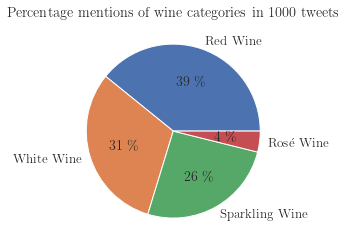

In [44]:
# Data of each wine and the number of tweets they get
data = [908, 721, 599, 90]
keys = ['Red Wine', 'White Wine', 'Sparkling Wine', 'Rosé Wine']

#set the colour palette
palette_color = sns.color_palette() 
sns.set_style()
plt.rc('text', usetex=True)
plt.rc('font', family='Georgia', size=14)
#set the font scale
# sns.set(font_scale=1.2)


# Plotting the pie chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f \%%')
plt.title('Percentage mentions of wine categories in 1000 tweets')

#save chart
plt.savefig('pie_chart.png',dpi=600) #- uncomment to save chart

# displaying chart
plt.show()